Saving Impulse-noise-a-5050-white-black-ideal-image-b-Contaminated-by-salt-and-pepper.png to Impulse-noise-a-5050-white-black-ideal-image-b-Contaminated-by-salt-and-pepper.png


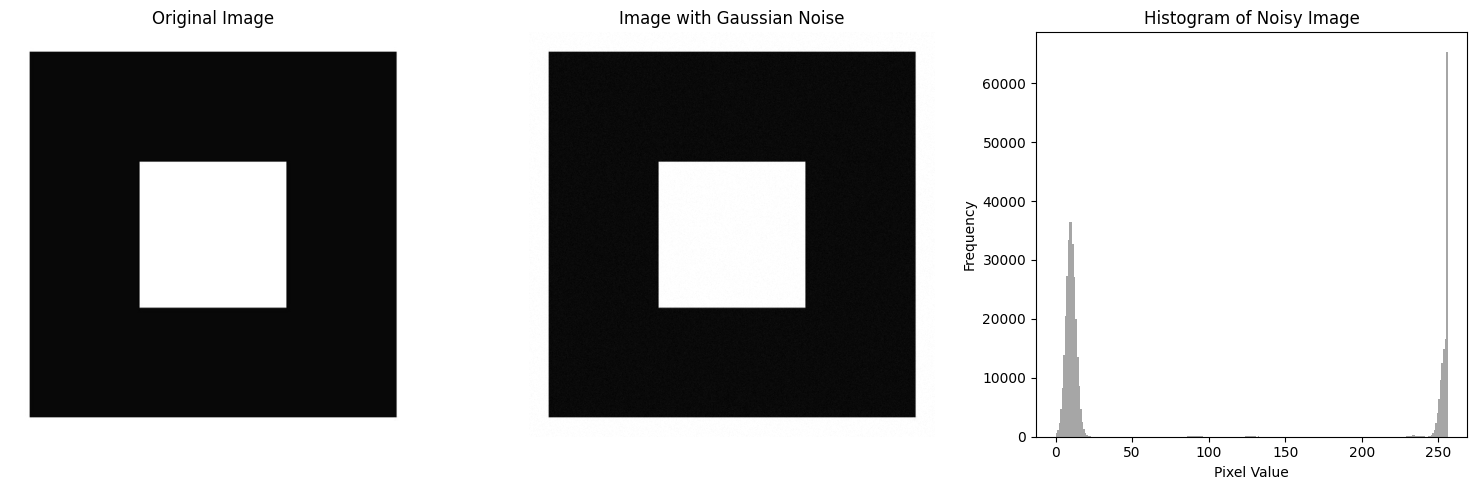

In [1]:
# Step 1: Install required libraries
!pip install opencv-python-headless numpy matplotlib

# Step 2: Upload an image
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Assuming the uploaded file is an image
image_path = next(iter(uploaded))  # Get the uploaded image file name

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 3: Define the noise function
def add_gaussian_noise(image, mean=0, var=10):
    """
    Add Gaussian noise to an image.

    Parameters:
    image (numpy array): The original image.
    mean (float): Mean of the Gaussian noise.
    var (float): Variance of the Gaussian noise.

    Returns:
    numpy array: The image with Gaussian noise.
    """
    sigma = var**0.5
    gaussian = np.random.normal(mean, sigma, image.shape)  # Gaussian noise
    noisy_image = image + gaussian

    # Clip the values to be in the correct range
    noisy_image = np.clip(noisy_image, 0, 255)
    noisy_image = noisy_image.astype(np.uint8)

    return noisy_image

# Step 4: Apply noise, display images, and plot histogram
# Set noise parameters
mean = 0
var = 10

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image, mean, var)

# Plot the original, noisy images and the histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Histogram of Noisy Image')
plt.hist(noisy_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()